In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from scipy.stats import poisson
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
from IPython.display import display, HTML
import random
import scipy.stats as stats
import sklearn

C:\Users\Hector Repilloza\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read the excel file WorldCup2018
WorldCup2018 = pd.read_excel('Worldcup2018.xlsx')

In [3]:
#Information about the dataset
WorldCup2018['Goal_Diff'].value_counts()

 0     8835
 1     7744
-1     5377
 2     4884
-2     2824
 3     2714
 4     1389
-3     1272
 5      757
-4      603
 6      405
-5      252
 7      236
-6      165
 8      134
-7       83
 9       73
-8       42
 10      32
 11      23
 12      20
-9       18
-10      15
 13       9
 14       7
-12       4
-11       4
-13       4
-15       3
 16       3
 19       2
 15       2
 17       2
-14       2
 31       1
-21       1
-20       1
-18       1
-17       1
 20       1
 22       1
-16       1
Name: Goal_Diff, dtype: int64

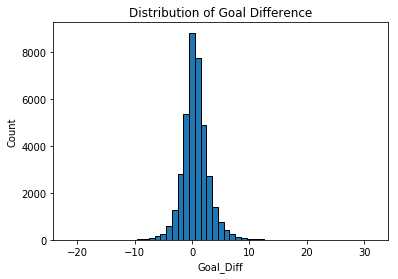

In [4]:
# Histogram of Goal_Diff
plt.bar(WorldCup2018['Goal_Diff'].value_counts().index, 
        WorldCup2018['Goal_Diff'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Goal_Diff'); plt.ylabel('Count'); plt.title('Distribution of Goal Difference');
plt.show()

In [5]:
#Possible Target Variable for Regression - Goal Difference
WorldCup2018['Goal_Diff'] = WorldCup2018['Home_Score'] - WorldCup2018['Away_Score']

In [6]:
#Detect Outliers - Goal_Diff
WorldCup2018 = WorldCup2018[np.abs(WorldCup2018.Goal_Diff-WorldCup2018.Goal_Diff.mean())<=(3*WorldCup2018.Goal_Diff.std())] 

In [7]:
WorldCup2018['Goal_Diff'].value_counts()

 0    8835
 1    7744
-1    5377
 2    4884
-2    2824
 3    2714
 4    1389
-3    1272
 5     757
-4     603
 6     405
-5     252
 7     236
-6     165
Name: Goal_Diff, dtype: int64

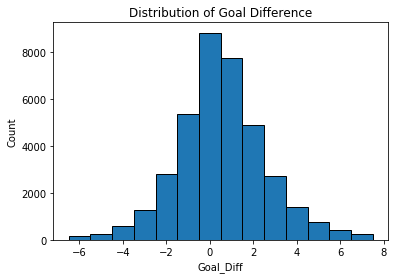

In [8]:
# Histogram of Goal_Diff without Outliers
plt.bar(WorldCup2018['Goal_Diff'].value_counts().index, 
        WorldCup2018['Goal_Diff'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Goal_Diff'); plt.ylabel('Count'); plt.title('Distribution of Goal Difference');
plt.show()

In [9]:
#Possible Target Variable for Regression - Total Number of Goals
WorldCup2018['NumberofGoals'] = WorldCup2018['Home_Score'] + WorldCup2018['Away_Score']
#Detect Outliers - NUmberofGoals- DON'T RUN THIS
#WorldCup2018 = WorldCup2018[np.abs(WorldCup2018.NumberofGoals-WorldCup2018.NumberofGoals.mean())<=(3*WorldCup2018.NumberofGoals.std())] 

In [11]:
#Convert Date from object to date format
WorldCup2018['Date'] = pd.to_datetime(WorldCup2018['Date'])
#Sort by date
WorldCup2018 = WorldCup2018.sort_values(by = 'Date')
#Rearrange the columns in different order
WorldCup2018 = WorldCup2018[['Id_Match','Date','Home_Team_Confederation','Home_Team','Home_Team_Fifa_Code','Away_Team_Fifa_Code','Away_Team','Away_Team_Confederation','Home_Score','Away_Score','Tournament','Country','Neutral','Goal_Diff']]

In [12]:
WorldCup2018.head()

,Id_Match,Date,Home_Team_Confederation,Home_Team,Home_Team_Fifa_Code,Away_Team_Fifa_Code,Away_Team,Away_Team_Confederation,Home_Score,Away_Score,Tournament,Country,Neutral,Goal_Diff
0,1,1872-11-30,UEFA,Scotland,SCO,ENG,England,UEFA,0,0,Friendly,Scotland,False,0
1,2,1873-03-08,UEFA,England,ENG,SCO,Scotland,UEFA,4,2,Friendly,England,False,2
2,3,1874-03-07,UEFA,Scotland,SCO,ENG,England,UEFA,2,1,Friendly,Scotland,False,1
3,4,1875-03-06,UEFA,England,ENG,SCO,Scotland,UEFA,2,2,Friendly,England,False,0
4,5,1876-03-04,UEFA,Scotland,SCO,ENG,England,UEFA,3,0,Friendly,Scotland,False,3


In [13]:
#Rename Tournament into four: FIFA World Cup, Final, Qualification and Friendly
def function (row):
   if row['Tournament'] == 'FIFA World Cup' :
      return 'FIFA World Cup'
   if row['Tournament'] == 'UEFA Euro' :
      return 'Final'
   if row['Tournament'] == 'Confederations Cup' :
      return 'Final'
   if row['Tournament'] == 'Copa America' :
      return 'Final'
   if row['Tournament'] == 'CONCACAF Championship' :
      return 'Final'
   if row['Tournament'] == 'African Cup of Nations' :
      return 'Final'
   if row['Tournament'] == 'AFC Asian Cup' :
      return 'Final'
   if row['Tournament'] == 'Oceania Nations Cup' :
      return 'Final'
   if row['Tournament'] == 'FIFA World Cup qualification' :
      return 'Qualification'
   if row['Tournament'] == 'UEFA Euro qualification' :
      return 'Qualification'
   if row['Tournament'] == 'CONCACAF Championship qualification' :
      return 'Qualification'
   if row['Tournament'] == 'African Cup of Nations qualification' :
      return 'Qualification'
   if row['Tournament'] == 'AFC Asian Cup qualification' :
      return 'Qualification'
   if row['Tournament'] == 'Friendly' :
      return 'Friendly'

In [14]:
WorldCup2018['New_Tournament'] = WorldCup2018.apply (lambda row: function (row),axis=1)

In [15]:
#Filling empty values of other tournaments as friendly matches
WorldCup2018['New_Tournament'].fillna('Friendly', inplace=True)

In [16]:
#Identifying the different types of tournaments
WorldCup2018['Tournament'].value_counts()

Friendly                                15831
FIFA World Cup qualification             6965
UEFA Euro qualification                  2305
African Cup of Nations qualification     1556
FIFA World Cup                            827
Copa America                              774
AFC Asian Cup qualification               689
African Cup of Nations                    638
CECAFA Cup                                497
British Championship                      490
Merdeka Tournament                        478
CFU Caribbean Cup qualification           430
Gulf Cup                                  332
AFC Asian Cup                             317
UEFA Euro                                 286
Nordic Championship                       278
Gold Cup                                  269
AFF Championship                          261
COSAFA Cup                                251
Americar Cabral Cup                       235
King's Cup                                227
UNCAF Cup                         

In [17]:
#New types of tournaments
WorldCup2018['New_Tournament'].value_counts()

Friendly          22804
Qualification     11536
Final              2290
FIFA World Cup      827
Name: New_Tournament, dtype: int64

In [18]:
WorldCup2018.reset_index()

,index,Id_Match,Date,Home_Team_Confederation,Home_Team,Home_Team_Fifa_Code,Away_Team_Fifa_Code,Away_Team,Away_Team_Confederation,Home_Score,Away_Score,Tournament,Country,Neutral,Goal_Diff,New_Tournament
0,0,1,1872-11-30,UEFA,Scotland,SCO,ENG,England,UEFA,0,0,Friendly,Scotland,False,0,Friendly
1,1,2,1873-03-08,UEFA,England,ENG,SCO,Scotland,UEFA,4,2,Friendly,England,False,2,Friendly
2,2,3,1874-03-07,UEFA,Scotland,SCO,ENG,England,UEFA,2,1,Friendly,Scotland,False,1,Friendly
3,3,4,1875-03-06,UEFA,England,ENG,SCO,Scotland,UEFA,2,2,Friendly,England,False,0,Friendly
4,4,5,1876-03-04,UEFA,Scotland,SCO,ENG,England,UEFA,3,0,Friendly,Scotland,False,3,Friendly
5,5,6,1876-03-25,UEFA,Scotland,SCO,WAL,Wales,UEFA,4,0,Friendly,Scotland,False,4,Friendly
6,6,7,1877-03-03,UEFA,England,ENG,SCO,Scotland,UEFA,1,3,Friendly,England,False,-2,Friendly
7,7,8,1877-03-05,UEFA,Wales,WAL,SCO,Scotland,UEFA,0,2,Friendly,Wales,False,-2,Friendly
8,8,9,1878-03-02,UEFA,Scotland,SCO,ENG,England,UEFA,7,2,Friendly,Scotland,False,5,Friendly
9,10,11,1879-01-18,UEFA,England,ENG,WAL,Wales,UEFA,2,1,Friendly,England,False,1,Friendly


In [19]:
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37946
Data columns (total 15 columns):
Id_Match                   37457 non-null int64
Date                       37457 non-null datetime64[ns]
Home_Team_Confederation    37457 non-null object
Home_Team                  37457 non-null object
Home_Team_Fifa_Code        37457 non-null object
Away_Team_Fifa_Code        37457 non-null object
Away_Team                  37457 non-null object
Away_Team_Confederation    37457 non-null object
Home_Score                 37457 non-null int64
Away_Score                 37457 non-null int64
Tournament                 37457 non-null object
Country                    37457 non-null object
Neutral                    37457 non-null bool
Goal_Diff                  37457 non-null int64
New_Tournament             37457 non-null object
dtypes: bool(1), datetime64[ns](1), int64(4), object(9)
memory usage: 4.3+ MB


In [20]:
#Tournament_Weight: FIFA World Cup (4), Final (3), Qualification (2.5) and Friendly (1)
WorldCup2018['Tournament_Weight'] = np.where(WorldCup2018.New_Tournament == 'FIFA World Cup', '4', 
                                         np.where(WorldCup2018.New_Tournament == 'Final', '3',
                                         np.where(WorldCup2018.New_Tournament == 'Qualification', '2.5','1')))

In [21]:
WorldCup2018['Tournament_Weight'].value_counts()

1      22804
2.5    11536
3       2290
4        827
Name: Tournament_Weight, dtype: int64

In [22]:
#New feature FIFA World Cup, Final, Qualification and Friendly
WorldCup2018['Friendly'] = WorldCup2018['New_Tournament'] == 'Friendly'
WorldCup2018['Qualification'] = WorldCup2018['New_Tournament'] == 'Qualification'
WorldCup2018['Final'] = WorldCup2018['New_Tournament'] == 'Final'
WorldCup2018['FIFAWorldCup'] = WorldCup2018['New_Tournament'] == 'FIFA World Cup'

In [23]:
WorldCup2018['Friendly'].value_counts()

True     22804
False    14653
Name: Friendly, dtype: int64

In [24]:
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37946
Data columns (total 20 columns):
Id_Match                   37457 non-null int64
Date                       37457 non-null datetime64[ns]
Home_Team_Confederation    37457 non-null object
Home_Team                  37457 non-null object
Home_Team_Fifa_Code        37457 non-null object
Away_Team_Fifa_Code        37457 non-null object
Away_Team                  37457 non-null object
Away_Team_Confederation    37457 non-null object
Home_Score                 37457 non-null int64
Away_Score                 37457 non-null int64
Tournament                 37457 non-null object
Country                    37457 non-null object
Neutral                    37457 non-null bool
Goal_Diff                  37457 non-null int64
New_Tournament             37457 non-null object
Tournament_Weight          37457 non-null object
Friendly                   37457 non-null bool
Qualification              37457 non-null bool
Final      

In [25]:
#Outcome WIN LOST DRAW
def function3 (row3):
   if row3['Home_Score'] > row3['Away_Score'] :
      return 'WIN'
   if row3['Home_Score'] < row3['Away_Score'] :
      return 'LOST'
   if row3['Home_Score'] == row3['Away_Score'] :
      return 'DRAW'

In [26]:
WorldCup2018['Outcome'] = WorldCup2018.apply (lambda row3: function3 (row3),axis=1)

In [27]:
#New feature WIN LOST DRAW
WorldCup2018['WIN'] = WorldCup2018['Outcome'] == 'WIN'
WorldCup2018['DRAW'] = WorldCup2018['Outcome'] == 'DRAW'
WorldCup2018['LOST'] = WorldCup2018['Outcome'] == 'LOST'

In [28]:
WorldCup2018['WIN'].value_counts()

False    19328
True     18129
Name: WIN, dtype: int64

In [29]:
#Confederation Weight: UEFA, CAF, AFC, CONCACAF, CONMEBOL and OFC by Home and Away
def function4 (row4):
   if row4['Home_Team_Confederation'] == 'UEFA' :
      return '0.99'
   if row4['Home_Team_Confederation'] == 'CAF' :
      return '0.85'
   if row4['Home_Team_Confederation'] == 'AFC' :
      return '0.85'
   if row4['Home_Team_Confederation'] == 'CONCACAF' :
      return '0.85'
   if row4['Home_Team_Confederation'] == 'CONMEBOL' :
      return '1.00'
   if row4['Home_Team_Confederation'] == 'OFC' :
      return '0.85'
def function5 (row5):
   if row5['Away_Team_Confederation'] == 'UEFA' :
      return '0.99'
   if row5['Away_Team_Confederation'] == 'CAF' :
      return '0.85'
   if row5['Away_Team_Confederation'] == 'AFC' :
      return '0.85'
   if row5['Away_Team_Confederation'] == 'CONCACAF' :
      return '0.85'
   if row5['Away_Team_Confederation'] == 'CONMEBOL' :
      return '1.00'
   if row5['Away_Team_Confederation'] == 'OFC' :
      return '0.85'

In [30]:
WorldCup2018['Home_Conf_Weight'] = WorldCup2018.apply (lambda row4: function4 (row4),axis=1)

In [31]:
WorldCup2018['Home_Conf_Weight'].value_counts()

0.85    20967
0.99    13319
1.00     3171
Name: Home_Conf_Weight, dtype: int64

In [32]:
WorldCup2018['Away_Conf_Weight'] = WorldCup2018.apply (lambda row5: function5 (row5),axis=1)

In [33]:
WorldCup2018['Away_Conf_Weight'].value_counts()

0.85    20508
0.99    13553
1.00     3396
Name: Away_Conf_Weight, dtype: int64

In [34]:
#New feature Home_Away comparing with venue
def function7 (row7):
    
 if row7['Home_Team'] == row7['Country']:
      return 'Home'
 if (row7['Home_Team'] != row7['Country']):
      return 'Away'
#& (row7['Neutral'] == False)

In [35]:
WorldCup2018['Home_Away'] = WorldCup2018.apply (lambda row7: function7 (row7),axis=1)

In [36]:
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37946
Data columns (total 27 columns):
Id_Match                   37457 non-null int64
Date                       37457 non-null datetime64[ns]
Home_Team_Confederation    37457 non-null object
Home_Team                  37457 non-null object
Home_Team_Fifa_Code        37457 non-null object
Away_Team_Fifa_Code        37457 non-null object
Away_Team                  37457 non-null object
Away_Team_Confederation    37457 non-null object
Home_Score                 37457 non-null int64
Away_Score                 37457 non-null int64
Tournament                 37457 non-null object
Country                    37457 non-null object
Neutral                    37457 non-null bool
Goal_Diff                  37457 non-null int64
New_Tournament             37457 non-null object
Tournament_Weight          37457 non-null object
Friendly                   37457 non-null bool
Qualification              37457 non-null bool
Final      

In [37]:
WorldCup2018['Home_Away'].value_counts()

Home    28353
Away     9104
Name: Home_Away, dtype: int64

In [38]:
#New feature Home and Away comparing with venue
WorldCup2018['Home'] = np.where(WorldCup2018.Home_Away == 'Home', 'True','False')
WorldCup2018['Away'] = np.where(WorldCup2018.Home_Away == 'Away', 'True','False')

In [39]:
WorldCup2018['Home'].value_counts()

True     28353
False     9104
Name: Home, dtype: int64

In [40]:
WorldCup2018[['Country','Home_Team', 'Away_Team', 'Home_Away', 'Home', 'Away']].head()

,Country,Home_Team,Away_Team,Home_Away,Home,Away
0,Scotland,Scotland,England,Home,True,False
1,England,England,Scotland,Home,True,False
2,Scotland,Scotland,England,Home,True,False
3,England,England,Scotland,Home,True,False
4,Scotland,Scotland,England,Home,True,False


In [41]:
WorldCup2018 = WorldCup2018.drop('Home_Away', 1)

In [42]:
#Split the date to year, month, day
WorldCup2018[['Year','Month','Day']] = WorldCup2018.Date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
WorldCup2018 = WorldCup2018.drop('Month', 1)
WorldCup2018 = WorldCup2018.drop('Day', 1)

In [43]:
#Calculate the Date_Weight
WorldCup2018.loc[:,'Date_Weight'] = 1 / (2019 - WorldCup2018['Date'].dt.year.astype('int64'))
WorldCup2018.head()

,Id_Match,Date,Home_Team_Confederation,Home_Team,Home_Team_Fifa_Code,Away_Team_Fifa_Code,Away_Team,Away_Team_Confederation,Home_Score,Away_Score,...,Outcome,WIN,DRAW,LOST,Home_Conf_Weight,Away_Conf_Weight,Home,Away,Year,Date_Weight
0,1,1872-11-30,UEFA,Scotland,SCO,ENG,England,UEFA,0,0,...,DRAW,False,True,False,0.99,0.99,True,False,1872,0.006803
1,2,1873-03-08,UEFA,England,ENG,SCO,Scotland,UEFA,4,2,...,WIN,True,False,False,0.99,0.99,True,False,1873,0.006849
2,3,1874-03-07,UEFA,Scotland,SCO,ENG,England,UEFA,2,1,...,WIN,True,False,False,0.99,0.99,True,False,1874,0.006897
3,4,1875-03-06,UEFA,England,ENG,SCO,Scotland,UEFA,2,2,...,DRAW,False,True,False,0.99,0.99,True,False,1875,0.006944
4,5,1876-03-04,UEFA,Scotland,SCO,ENG,England,UEFA,3,0,...,WIN,True,False,False,0.99,0.99,True,False,1876,0.006993


In [44]:
WorldCup2018 = WorldCup2018.drop('Year', 1)

In [45]:
#WorldCup2018.dtypes
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37946
Data columns (total 29 columns):
Id_Match                   37457 non-null int64
Date                       37457 non-null datetime64[ns]
Home_Team_Confederation    37457 non-null object
Home_Team                  37457 non-null object
Home_Team_Fifa_Code        37457 non-null object
Away_Team_Fifa_Code        37457 non-null object
Away_Team                  37457 non-null object
Away_Team_Confederation    37457 non-null object
Home_Score                 37457 non-null int64
Away_Score                 37457 non-null int64
Tournament                 37457 non-null object
Country                    37457 non-null object
Neutral                    37457 non-null bool
Goal_Diff                  37457 non-null int64
New_Tournament             37457 non-null object
Tournament_Weight          37457 non-null object
Friendly                   37457 non-null bool
Qualification              37457 non-null bool
Final      

In [ ]:
#WorldCup2018.to_csv('WorldCup2018_Attributes.csv')

In [46]:
#Dummies Variables Home_Team_Confederation & Away_Team_Confederation
#Dummies Variables Home_Team_Confederation out the Confederation OFC
WorldCup2018['Home_Team_UEFA'] = np.where(WorldCup2018.Home_Team_Confederation == 'UEFA', '1','0')
WorldCup2018['Home_Team_CONMEBOL'] = np.where(WorldCup2018.Home_Team_Confederation == 'CONMEBOL', '1','0')
WorldCup2018['Home_Team_CONCACAF'] = np.where(WorldCup2018.Home_Team_Confederation == 'CONCACAF', '1','0')
WorldCup2018['Home_Team_AFC'] = np.where(WorldCup2018.Home_Team_Confederation == 'AFC', '1','0')
WorldCup2018['Home_Team_CAF'] = np.where(WorldCup2018.Home_Team_Confederation == 'CAF', '1','0')
WorldCup2018['Home_Team_OFC'] = np.where(WorldCup2018.Home_Team_Confederation == 'OFC', '1','0')

#Dummies Variables Away_Team_Confederation out the Confederation OFC
WorldCup2018['Away_Team_UEFA'] = np.where(WorldCup2018.Away_Team_Confederation == 'UEFA', '1','0')
WorldCup2018['Away_Team_CONMEBOL'] = np.where(WorldCup2018.Away_Team_Confederation == 'CONMEBOL', '1','0')
WorldCup2018['Away_Team_CONCACAF'] = np.where(WorldCup2018.Away_Team_Confederation == 'CONCACAF', '1','0')
WorldCup2018['Away_Team_AFC'] = np.where(WorldCup2018.Away_Team_Confederation == 'AFC', '1','0')
WorldCup2018['Away_Team_CAF'] = np.where(WorldCup2018.Away_Team_Confederation == 'CAF', '1','0')
WorldCup2018['Away_Team_OFC'] = np.where(WorldCup2018.Away_Team_Confederation == 'OFC', '1','0')

In [47]:
WorldCup2018['Home_Team_UEFA'].value_counts()

0    24138
1    13319
Name: Home_Team_UEFA, dtype: int64

In [48]:
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37946
Data columns (total 41 columns):
Id_Match                   37457 non-null int64
Date                       37457 non-null datetime64[ns]
Home_Team_Confederation    37457 non-null object
Home_Team                  37457 non-null object
Home_Team_Fifa_Code        37457 non-null object
Away_Team_Fifa_Code        37457 non-null object
Away_Team                  37457 non-null object
Away_Team_Confederation    37457 non-null object
Home_Score                 37457 non-null int64
Away_Score                 37457 non-null int64
Tournament                 37457 non-null object
Country                    37457 non-null object
Neutral                    37457 non-null bool
Goal_Diff                  37457 non-null int64
New_Tournament             37457 non-null object
Tournament_Weight          37457 non-null object
Friendly                   37457 non-null bool
Qualification              37457 non-null bool
Final      

In [49]:
#Transform Outcome(WIN, DRAW, LOST) in -1,0,1,
WorldCup2018['Outcome'] = np.where(WorldCup2018.Outcome == 'WIN', '1',
                           np.where(WorldCup2018.Outcome == 'LOST','-1', '0'))

In [50]:
WorldCup2018['Outcome'].value_counts()

1     18129
-1    10493
0      8835
Name: Outcome, dtype: int64

In [51]:
#Read the excel file team_features
team_features_home = pd.read_csv('team_features_home.csv')
#Rearrange the columns in different order
team_features_home = team_features_home[['Id_Match','name','last5games_w_per_home','last10games_w_per_home','last20games_w_per_home','last5games_l_per_home','last10games_l_per_home','last20games_l_per_home','last5games_d_per_home','last10games_d_per_home','last20games_d_per_home','last5games_gd_per_home','last10games_gd_per_home','last20games_gd_per_home','last5games_opp_cc_per_home','last10games_opp_cc_per_home','last20games_opp_cc_per_home']]
team_features_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37457 entries, 0 to 37456
Data columns (total 17 columns):
Id_Match                       37457 non-null int64
name                           37457 non-null object
last5games_w_per_home          37457 non-null float64
last10games_w_per_home         37457 non-null float64
last20games_w_per_home         37457 non-null float64
last5games_l_per_home          37457 non-null float64
last10games_l_per_home         37457 non-null float64
last20games_l_per_home         37457 non-null float64
last5games_d_per_home          37457 non-null float64
last10games_d_per_home         37457 non-null float64
last20games_d_per_home         37457 non-null float64
last5games_gd_per_home         37457 non-null float64
last10games_gd_per_home        37457 non-null float64
last20games_gd_per_home        37457 non-null float64
last5games_opp_cc_per_home     37457 non-null float64
last10games_opp_cc_per_home    37457 non-null float64
last20games_opp_cc_per_home   

In [52]:
WorldCup2018 = WorldCup2018.merge(team_features_home, 
                        left_on=['Id_Match', 'Home_Team_Fifa_Code'], 
                        right_on=['Id_Match', 'name'])

In [53]:
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37456
Data columns (total 57 columns):
Id_Match                       37457 non-null int64
Date                           37457 non-null datetime64[ns]
Home_Team_Confederation        37457 non-null object
Home_Team                      37457 non-null object
Home_Team_Fifa_Code            37457 non-null object
Away_Team_Fifa_Code            37457 non-null object
Away_Team                      37457 non-null object
Away_Team_Confederation        37457 non-null object
Home_Score                     37457 non-null int64
Away_Score                     37457 non-null int64
Tournament                     37457 non-null object
Country                        37457 non-null object
Neutral                        37457 non-null bool
Goal_Diff                      37457 non-null int64
New_Tournament                 37457 non-null object
Tournament_Weight              37457 non-null object
Friendly                       37457 non-

In [54]:
#Drop columns (0-rows, 1-columns)
WorldCup2018 = WorldCup2018.drop('name', 1)
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37456
Data columns (total 56 columns):
Id_Match                       37457 non-null int64
Date                           37457 non-null datetime64[ns]
Home_Team_Confederation        37457 non-null object
Home_Team                      37457 non-null object
Home_Team_Fifa_Code            37457 non-null object
Away_Team_Fifa_Code            37457 non-null object
Away_Team                      37457 non-null object
Away_Team_Confederation        37457 non-null object
Home_Score                     37457 non-null int64
Away_Score                     37457 non-null int64
Tournament                     37457 non-null object
Country                        37457 non-null object
Neutral                        37457 non-null bool
Goal_Diff                      37457 non-null int64
New_Tournament                 37457 non-null object
Tournament_Weight              37457 non-null object
Friendly                       37457 non-

In [55]:
#Read the excel file team_features
team_features_away = pd.read_csv('team_features_away.csv')
#Rearrange the columns in different order
team_features_away = team_features_away[['Id_Match','name','last5games_w_per_away','last10games_w_per_away','last20games_w_per_away','last5games_l_per_away','last10games_l_per_away','last20games_l_per_away','last5games_d_per_away','last10games_d_per_away','last20games_d_per_away','last5games_gd_per_away','last10games_gd_per_away','last20games_gd_per_away','last5games_opp_cc_per_away','last10games_opp_cc_per_away','last20games_opp_cc_per_away']]
team_features_away.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37457 entries, 0 to 37456
Data columns (total 17 columns):
Id_Match                       37457 non-null int64
name                           37457 non-null object
last5games_w_per_away          37457 non-null float64
last10games_w_per_away         37457 non-null float64
last20games_w_per_away         37457 non-null float64
last5games_l_per_away          37457 non-null float64
last10games_l_per_away         37457 non-null float64
last20games_l_per_away         37457 non-null float64
last5games_d_per_away          37457 non-null float64
last10games_d_per_away         37457 non-null float64
last20games_d_per_away         37457 non-null float64
last5games_gd_per_away         37457 non-null float64
last10games_gd_per_away        37457 non-null float64
last20games_gd_per_away        37457 non-null float64
last5games_opp_cc_per_away     37457 non-null float64
last10games_opp_cc_per_away    37457 non-null float64
last20games_opp_cc_per_away   

In [56]:
WorldCup2018 = WorldCup2018.merge(team_features_away, 
                        left_on=['Id_Match', 'Away_Team_Fifa_Code'], 
                        right_on=['Id_Match', 'name'])

In [57]:
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37456
Data columns (total 72 columns):
Id_Match                       37457 non-null int64
Date                           37457 non-null datetime64[ns]
Home_Team_Confederation        37457 non-null object
Home_Team                      37457 non-null object
Home_Team_Fifa_Code            37457 non-null object
Away_Team_Fifa_Code            37457 non-null object
Away_Team                      37457 non-null object
Away_Team_Confederation        37457 non-null object
Home_Score                     37457 non-null int64
Away_Score                     37457 non-null int64
Tournament                     37457 non-null object
Country                        37457 non-null object
Neutral                        37457 non-null bool
Goal_Diff                      37457 non-null int64
New_Tournament                 37457 non-null object
Tournament_Weight              37457 non-null object
Friendly                       37457 non-

In [58]:
#Drop columns (0-rows, 1-columns)
WorldCup2018 = WorldCup2018.drop('name', 1)

In [59]:
#Drop columns (0-rows, 1-columns)
WorldCup2018 = WorldCup2018.drop('Tournament', 1)

In [60]:
WorldCup2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37457 entries, 0 to 37456
Data columns (total 70 columns):
Id_Match                       37457 non-null int64
Date                           37457 non-null datetime64[ns]
Home_Team_Confederation        37457 non-null object
Home_Team                      37457 non-null object
Home_Team_Fifa_Code            37457 non-null object
Away_Team_Fifa_Code            37457 non-null object
Away_Team                      37457 non-null object
Away_Team_Confederation        37457 non-null object
Home_Score                     37457 non-null int64
Away_Score                     37457 non-null int64
Country                        37457 non-null object
Neutral                        37457 non-null bool
Goal_Diff                      37457 non-null int64
New_Tournament                 37457 non-null object
Tournament_Weight              37457 non-null object
Friendly                       37457 non-null bool
Qualification                  37457 non-nu

In [61]:
#Final Dataset
WorldCup2018.to_csv('WorldCup2018_FINAL.csv')